In [25]:
import numpy as np
import csv
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle


In [26]:
def parse_csv(path_prefix, csv_filename, contains_headers=False):
    """
    Method that accepts the path_prefix and csv filename and returns
    a list of dictionary that embeds the features
    """
    csv_path = path_prefix + csv_filename
    images_path = path_prefix
    features = []
    with open(csv_path, newline='') as csvfile:
        csvreader = csv.reader(csvfile, skipinitialspace = True, delimiter=',')
        if contains_headers == 'True' :
            headers = next(csvreader)[1:]
            print("headers are:{}".format(headers))
        for row in csvreader:
            dict = {'center': images_path + row[0], \
            'left': images_path + row[1], \
            'right': images_path + row[2], \
            'angle': float(row[3])}
            features.append(dict)
    return features


def plot_image(image):
    plt.figure()
    plt.imshow(image)
    plt.show()

In [27]:
def drop_zero_steering_angles(steering_angles, drop_probability=0.97, threshold = 0):
    """
    Accepts training data and conditionally drops the data with zero steering angle, with
    'drop_probability'
    traning_data is a dictionary with angles ranging from -0.5 to 0.5
    """
    steering_angles_a = np.asarray(steering_angles)
    throwaway_indices = []

    for i in range(len(steering_angles_a)):
        datapoint = steering_angles_a[i]
        if abs(datapoint) <= 0.05:
            throwaway_indices.append(i)

    throwaway_count = int(len(throwaway_indices) * drop_probability)
    shuffle(throwaway_indices)
    throwaway_indices = throwaway_indices[0:throwaway_count]
    training_data_a = np.delete(steering_angles_a, throwaway_indices)

    return training_data_a

In [28]:
def augment_with_flipped_images(images, steering_angles):
    """
    Function that accepts training data and augments it with flipped images and
    adjusts steering angle accordingly
    """
    augmented_images = []
    augmented_steering_angles = []
    for this_image, this_steering_angle in zip(images, steering_angles):
        augmented_images.append(this_image)
        augmented_steering_angles.append(this_steering_angle)
        
        augmented_images.append(cv2.flip(this_image, 1))
        augmented_steering_angles.append(this_steering_angle * -1.0)
    return augmented_images, augmented_steering_angles


def preprocess(center_images, left_images, right_images, steering_angles, bias = 0.2):
    """
    Top level feature pre-processing function. This function will apply
    verious pre-processing techniques to the features and return the pre-
    processed images and driving angles
    """
    print("Preprocess got: Length of center_images = {}".format(len(center_images)))
    print("Preprocess got: Length of left_images = {}".format(len(left_images)))
    print("Preprocess got: Length of right_images = {}".format(len(right_images)))
    print("Preprocess got: Length of steering_angles = {}".format(len(steering_angles)))
    images = []
    angles = []
    
    #for center, left, right, steering_angle in zip(center_images, left_images, right_images, steering_angles):  
    for center, left, right, angle in zip(center_images, left_images, right_images, steering_angles):      
        images.append(center)
        angles.append(angle)

        images.append(left)
        angles.append(angle + bias)

        images.append(right)
        angles.append(angle - bias)
        
    print("Before augmenting, number of images:{}, number of steering angles:{}".format(len(images), len(angles)))
    
    # augmenting the data by flipping the images
    images, angles = augment_with_flipped_images(images, angles)
    print("After augmenting, number of images:{}, number of steering angles:{}".format(len(images), len(angles)))

    return images, angles

In [29]:
print("Pasing CSV...")
training_data = parse_csv("./runs/", "driving_log.csv")

center_images = []
left_images = []
right_images = []
steering_angles = []

for sample in training_data:
    center_image = cv2.imread(sample['center'])
    center_image = cv2.cvtColor(center_image, cv2.COLOR_BGR2RGB)
    center_images.append(center_image)
    
    left_image = cv2.imread(sample['left'])
    left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
    left_images.append(left_image)
    
    right_image = cv2.imread(sample['right'])
    right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)
    right_images.append(right_image)
    
    steering_angle = sample['angle']
    steering_angles.append(steering_angle)
    
print("Length of center images:{}, length of steering angles:{}".format(len(center_images), len(steering_angles)))


Pasing CSV...
Length of center images:15094, length of steering angles:15094


Steering angles distribution before dropping zeroes:


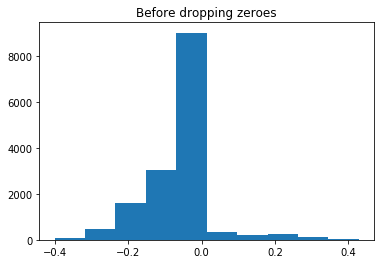

In [30]:
print("Steering angles distribution before dropping zeroes:")    
plt.hist(steering_angles)
plt.title("Before dropping zeroes")
plt.show()


Steering angles distribution after dropping zeroes:


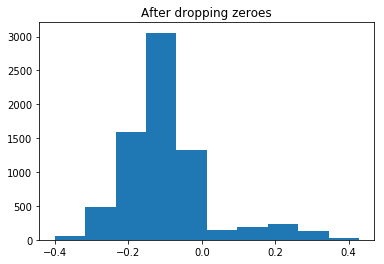

In [31]:
print("Steering angles distribution after dropping zeroes:")    
steering_angles = drop_zero_steering_angles(steering_angles)  
plt.hist(steering_angles)
plt.title("After dropping zeroes")
plt.show()

Steering angles distribution after augmentation:


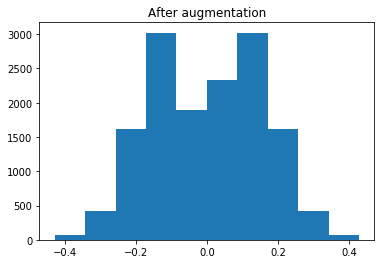

In [32]:
print("Steering angles distribution after augmentation:")    
augmented_steering_angles = []
for angle in steering_angles:
    augmented_steering_angles.append(angle)
    augmented_steering_angles.append(angle * -1)
    
plt.hist(augmented_steering_angles)
plt.title("After augmentation")
plt.show()

In [ ]:
images, steering_angles = preprocess(center_images, left_images, right_images, steering_angles)
    
#for image in images:
#    print("Shape of this image:{}".format(image.shape))
#    plot_image(image)